In [1]:
# Data source:
# https://www.freecodecamp.org/news/2021-new-coder-survey-18000-people-share-how-theyre-learning-to-code/
# https://www.kaggle.com/fccuser/2021-new-coder-survey
# https://github.com/freeCodeCamp/2021-new-coder-survey
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import seaborn as sns

In [2]:
df = pd.read_csv('2021_New Coder_Survey.csv')

/home/ubuntu/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.rename(columns={'22. About how much money did you earn last year from any job or employment (in US Dollars)? ': 'income'}, inplace=True)
df.rename(columns={'26. Which part of the world do you live in?': 'location'}, inplace=True)
df.rename(columns={'3. Which online learning resources have you found helpful? Please select all that apply.': 'resources'}, inplace=True)
df.rename(columns={'2. What methods have you used to learn about coding? Please select all that apply.': 'methods'}, inplace=True)
df.rename(columns={'32. What is the highest degree or level of school you have completed?': 'degree'}, inplace=True)
df.rename(columns={'39. How much debt does your household have? [Student Loans]': 'student_debt'}, inplace=True)

In [4]:
df = df[['income','location','resources','degree','methods','student_debt']]

In [5]:
#df['student_debt'].value_counts()
df['student_debt'] = df['student_debt'].replace('None', 0)
df['student_debt'] = df['student_debt'].replace('<$10k', 5000)
df['student_debt'] = df['student_debt'].replace('$10k- $25k', 17000)
df['student_debt'] = df['student_debt'].replace('$26k- $50k', 38000)
df['student_debt'] = df['student_debt'].replace('$51k- $100k', 75000)
df['student_debt'] = df['student_debt'].replace('$101k- $200k', 150000)
df['student_debt'] = df['student_debt'].replace('$201k- $500k', 300000)
df['student_debt'] = df['student_debt'].replace('>$500k', 600000)

In [ ]:
df['student_debt'].value_counts()

In [6]:
df = df[df['degree'].notna()]

In [7]:
# drop rows with non-numeric answers:
to_drop = ["I don't want to answer", "I don’t know"]
df = df[~df['income'].isin(to_drop)]

In [8]:
# Convert income brackets to numbers:
df['income'] = df['income'].replace('Under $1,000', 500)
df['income'] = df['income'].replace('$1,000 to $2,999', 2000)
df['income'] = df['income'].replace('$10,000 to $14,999', 12500)
df['income'] = df['income'].replace('$3,000 to $4,999', 40000)
df['income'] = df['income'].replace('$20,000 to $24,999', 22500)
df['income'] = df['income'].replace('$40,000 to $49,999', 45000)
df['income'] = df['income'].replace('$5,000 to $6,999', 6000)
df['income'] = df['income'].replace('$50,000 to $59,999', 55000)
df['income'] = df['income'].replace('$7,000 to $9,999', 8500)
df['income'] = df['income'].replace('$30,000 to $34,999', 32500)
df['income'] = df['income'].replace('$25,000 to $29,999', 27500)
df['income'] = df['income'].replace('None', 0)
df['income'] = df['income'].replace('$60,000 to $74,999', 67500)
df['income'] = df['income'].replace('$35,000 to $39,999', 37500)
df['income'] = df['income'].replace('$75,000 to $89,999', 82500)
df['income'] = df['income'].replace('$90,000 to $119,999', 105000)
df['income'] = df['income'].replace('$120,000 to $159,999', 135000)
df['income'] = df['income'].replace('$160,000 to $199,999', 180000)
df['income'] = df['income'].replace('$250,000 or over', 250000)
df['income'] = df['income'].replace('$200,000 to $249,999', 225000)
df['income'] = df['income'].replace('$15,000 to $19,999', 17500)

In [9]:
# Format Educational Attainment Values:
df['degree'] = df['degree'].replace("Bachelor's degree", 'BA')
df['degree'] = df['degree'].replace("Some college credit, no degree", 'SomeCollege')
df['degree'] = df['degree'].replace("High school diploma or equivalent (GED)", 'HSDip')
df['degree'] = df['degree'].replace("Associate’s degree", 'AssDeg')
df['degree'] = df['degree'].replace("Master's degree (non-professional)", 'MA')
df['degree'] = df['degree'].replace("Some high school", 'SomeHS')
df['degree'] = df['degree'].replace("Trade, technical, or vocational training", 'Trade')
df['degree'] = df['degree'].replace("Professional degree (MBA, MD, JD, etc.)", 'DegPro')
df['degree'] = df['degree'].replace("No high school (secondary school)", 'NoHS')

In [10]:
df = df[df['location'].notna()]
df = df[df['location'].str.contains("North America")]

In [11]:
df = df[df['methods'].notna()]
df_boot = df[df['methods'].str.contains("In-person bootcamps")]

In [12]:
df = df[df['resources'].notna()]
df_ps = df[df['resources'].str.contains("Pluralsight")]
df_fcc = df[df['resources'].str.contains("freeCodeCamp")]
df_coursera = df[df['resources'].str.contains("Coursera")]
df_ca = df[df['resources'].str.contains("Codecademy")]
df_ka = df[df['resources'].str.contains("Khan Academy")]
df_mdn = df[df['resources'].str.contains("MDN")]

## Correlate income and debt to formal education credentials

In [14]:
df_plot = df[['income','degree']]

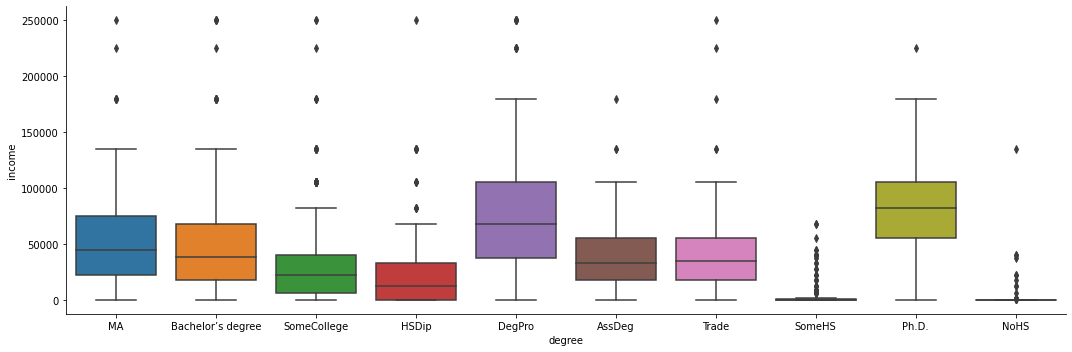

In [16]:
sns.catplot(x="degree", y="income", kind="box", data=df_plot, height=5, aspect=3)

In [18]:
df_debt = df[['student_debt', 'degree']]

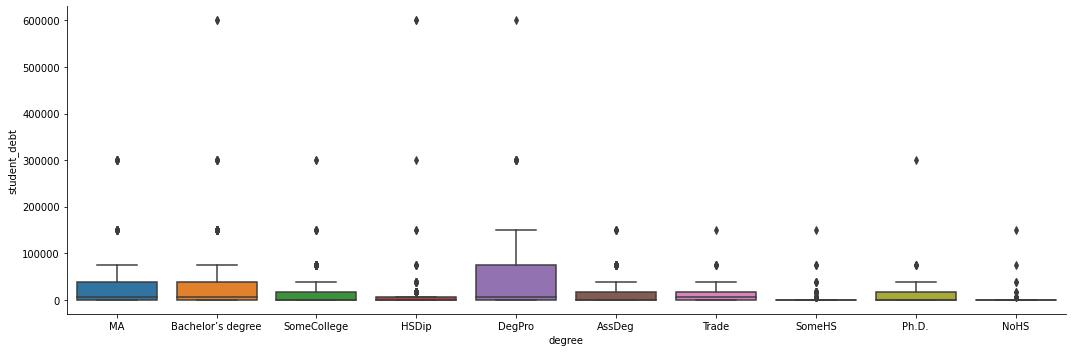

In [19]:
sns.catplot(x="degree", y="student_debt", kind="box", data=df_debt, height=5, aspect=3)

## Create dataframe for college graduates:

In [21]:
df_deg = df[df['degree'].str.contains("BA|MA|DegPro|AssDeg|Ph.D.")]

In [22]:
df['degree'].value_counts()

Bachelor’s degree    1433
SomeCollege          1097
HSDip                 526
AssDeg                346
MA                    307
SomeHS                282
Trade                 188
DegPro                180
NoHS                  134
Ph.D.                  40
Name: degree, dtype: int64

In [23]:
df_deg['degree'].value_counts()

AssDeg    346
MA        307
DegPro    180
Ph.D.      40
Name: degree, dtype: int64

## Income Calcuations:

In [ ]:
df_ps['income'].describe()

In [ ]:
df['income'].describe()

In [ ]:
df_coursera['income'].describe()

In [51]:
df_deg['income'].describe()

count       833.000000
mean      54445.378151
std       46768.054472
min           0.000000
25%       22500.000000
50%       45000.000000
75%       67500.000000
max      250000.000000
Name: income, dtype: float64

In [ ]:
df_boot['income'].describe() #in-person bootcamps only

## Income and Debt Levels:

In [25]:
df_boot.describe(include='all')  

,income,location,resources,degree,methods,student_debt
count,166.000000,175,169,175,175,149.000000
unique,NaN,1,148,10,57,NaN
top,NaN,North America,freeCodeCamp,Bachelor’s degree,"Online resources, Books, In-person bootcamps",NaN
freq,NaN,175,4,66,30,NaN
mean,42972.891566,NaN,NaN,NaN,NaN,22476.510067
std,41408.067433,NaN,NaN,NaN,NaN,43487.740412
min,0.000000,NaN,NaN,NaN,NaN,0.000000
25%,500.000000,NaN,NaN,NaN,NaN,0.000000
50%,32500.000000,NaN,NaN,NaN,NaN,0.000000
75%,67500.000000,NaN,NaN,NaN,NaN,17000.000000


In [26]:
df.describe(include='all')  

,income,location,resources,degree,methods,student_debt
count,4246.000000,4533,4533,4533,4533,3844.000000
unique,NaN,1,1817,10,744,NaN
top,NaN,North America,freeCodeCamp,Bachelor’s degree,Online resources,NaN
freq,NaN,4533,614,1433,1476,NaN
mean,36700.188413,NaN,NaN,NaN,NaN,19448.231009
std,38389.076098,NaN,NaN,NaN,NaN,45195.376883
min,0.000000,NaN,NaN,NaN,NaN,0.000000
25%,6000.000000,NaN,NaN,NaN,NaN,0.000000
50%,27500.000000,NaN,NaN,NaN,NaN,0.000000
75%,55000.000000,NaN,NaN,NaN,NaN,17000.000000


In [27]:
df_deg.describe(include='all')  

,income,location,resources,degree,methods,student_debt
count,833.000000,873,873,873,873,792.000000
unique,NaN,1,507,4,203,NaN
top,NaN,North America,freeCodeCamp,AssDeg,Online resources,NaN
freq,NaN,873,104,346,249,NaN
mean,54445.378151,NaN,NaN,NaN,NaN,32044.191919
std,46768.054472,NaN,NaN,NaN,NaN,62970.800261
min,0.000000,NaN,NaN,NaN,NaN,0.000000
25%,22500.000000,NaN,NaN,NaN,NaN,0.000000
50%,45000.000000,NaN,NaN,NaN,NaN,5000.000000
75%,67500.000000,NaN,NaN,NaN,NaN,38000.000000


In [28]:
df_ps.describe(include='all')  

,income,location,resources,degree,methods,student_debt
count,185.000000,188,188,188,188,172.000000
unique,NaN,1,164,8,72,NaN
top,NaN,North America,Pluralsight,Bachelor’s degree,"Online resources, Books",NaN
freq,NaN,188,4,85,48,NaN
mean,59008.108108,NaN,NaN,NaN,NaN,22180.232558
std,39535.532851,NaN,NaN,NaN,NaN,38308.642910
min,0.000000,NaN,NaN,NaN,NaN,0.000000
25%,32500.000000,NaN,NaN,NaN,NaN,0.000000
50%,55000.000000,NaN,NaN,NaN,NaN,5000.000000
75%,82500.000000,NaN,NaN,NaN,NaN,38000.000000


In [29]:
df_coursera.describe(include='all')  

,income,location,resources,degree,methods,student_debt
count,759.000000,798,798,798,798,699.000000
unique,NaN,1,445,10,165,NaN
top,NaN,North America,"freeCodeCamp, Coursera",Bachelor’s degree,"Online resources, Books",NaN
freq,NaN,798,41,296,214,NaN
mean,41503.293808,NaN,NaN,NaN,NaN,20964.234621
std,40975.131492,NaN,NaN,NaN,NaN,52072.410817
min,0.000000,NaN,NaN,NaN,NaN,0.000000
25%,8500.000000,NaN,NaN,NaN,NaN,0.000000
50%,32500.000000,NaN,NaN,NaN,NaN,0.000000
75%,55000.000000,NaN,NaN,NaN,NaN,17000.000000


In [30]:
df_fcc.describe(include='all')  

,income,location,resources,degree,methods,student_debt
count,3284.00000,3513,3513,3513,3513,2998.00000
unique,NaN,1,1307,10,549,NaN
top,NaN,North America,freeCodeCamp,Bachelor’s degree,Online resources,NaN
freq,NaN,3513,614,1106,1115,NaN
mean,35498.62972,NaN,NaN,NaN,NaN,19106.40427
std,37317.97632,NaN,NaN,NaN,NaN,44106.78437
min,0.00000,NaN,NaN,NaN,NaN,0.00000
25%,2000.00000,NaN,NaN,NaN,NaN,0.00000
50%,27500.00000,NaN,NaN,NaN,NaN,0.00000
75%,55000.00000,NaN,NaN,NaN,NaN,17000.00000


In [31]:
df_ka.describe(include='all')  

,income,location,resources,degree,methods,student_debt
count,841.000000,911,911,911,911,760.000000
unique,NaN,1,431,10,223,NaN
top,NaN,North America,"freeCodeCamp, Khan Academy",SomeCollege,"Online resources, Books",NaN
freq,NaN,911,77,248,221,NaN
mean,31683.115339,NaN,NaN,NaN,NaN,19810.526316
std,38348.764496,NaN,NaN,NaN,NaN,49273.252181
min,0.000000,NaN,NaN,NaN,NaN,0.000000
25%,500.000000,NaN,NaN,NaN,NaN,0.000000
50%,22500.000000,NaN,NaN,NaN,NaN,0.000000
75%,45000.000000,NaN,NaN,NaN,NaN,17000.000000


In [32]:
df_mdn.describe(include='all')  

,income,location,resources,degree,methods,student_debt
count,938.000000,996,996,996,996,868.000000
unique,NaN,1,615,10,189,NaN
top,NaN,North America,"freeCodeCamp, Mozilla Developer Network (MDN),...",Bachelor’s degree,"Online resources, Books",NaN
freq,NaN,996,37,389,240,NaN
mean,38506.929638,NaN,NaN,NaN,NaN,18577.188940
std,37846.735026,NaN,NaN,NaN,NaN,40406.438961
min,0.000000,NaN,NaN,NaN,NaN,0.000000
25%,8500.000000,NaN,NaN,NaN,NaN,0.000000
50%,32500.000000,NaN,NaN,NaN,NaN,0.000000
75%,55000.000000,NaN,NaN,NaN,NaN,17000.000000


In [34]:
df_ca.describe(include='all')  

,income,location,resources,degree,methods,student_debt
count,1482.000000,1585,1585,1585,1585,1348.000000
unique,NaN,1,716,10,290,NaN
top,NaN,North America,"freeCodeCamp, Codecademy",Bachelor’s degree,Online resources,NaN
freq,NaN,1585,144,531,433,NaN
mean,35275.641026,NaN,NaN,NaN,NaN,20917.655786
std,36062.203843,NaN,NaN,NaN,NaN,47022.904746
min,0.000000,NaN,NaN,NaN,NaN,0.000000
25%,6000.000000,NaN,NaN,NaN,NaN,0.000000
50%,27500.000000,NaN,NaN,NaN,NaN,0.000000
75%,55000.000000,NaN,NaN,NaN,NaN,17000.000000


## Visualizations:

In [35]:
df_incomes = pd.read_csv('incomes.csv')

/tmp/ipykernel_796/1098676605.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



<AxesSubplot:xlabel='resource'>

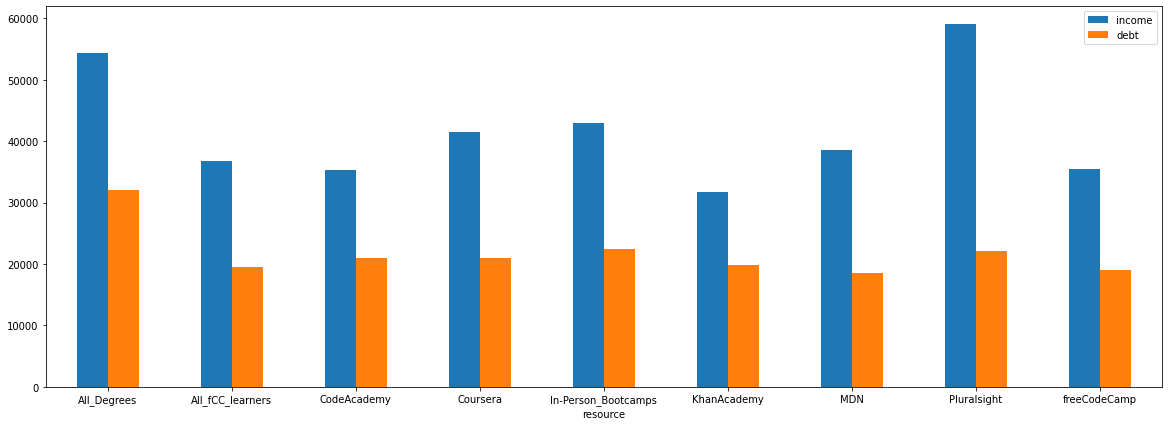

In [49]:
df_incomes.groupby("resource")['income','debt'].mean().plot(kind='bar', figsize=(20, 7), rot=0)

<AxesSubplot:>

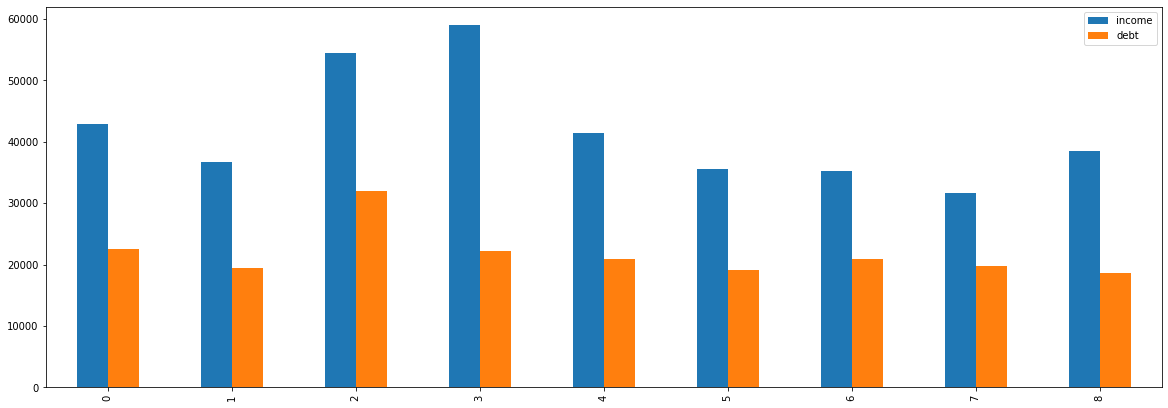

In [41]:
df_incomes.plot(kind="bar", figsize=(20, 7))